## Intro to Business Analytics Assignment 1

### Contributors
- Stanisław Howard
- Alexis Van den Heede
- Matthias Van Mechelen


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/Trips_2018.csv')

In [4]:
df_copy = df.copy()
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [5]:
# rerun this to save time if you make a typo and need original df again
df = df_copy.copy()

In [6]:
# col 0 is unnamed, change name to trip_id convert column to index
df.rename(columns={'Unnamed: 0':'trip_id'}, inplace=True)
df.set_index('trip_id', inplace=True)
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [7]:
#  convert start time and stop time to datetime objects
df['starttime'] = pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime'] = pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [8]:
# make user type dummy
df = pd.get_dummies(df, columns=['usertype'], dtype=int, drop_first=True)
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1


In [9]:
# plotting coordinates
def plot_map(coords):
    plt.scatter(coords[:,0], coords[:,1], s=0.75)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [10]:
# get lat and long
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)


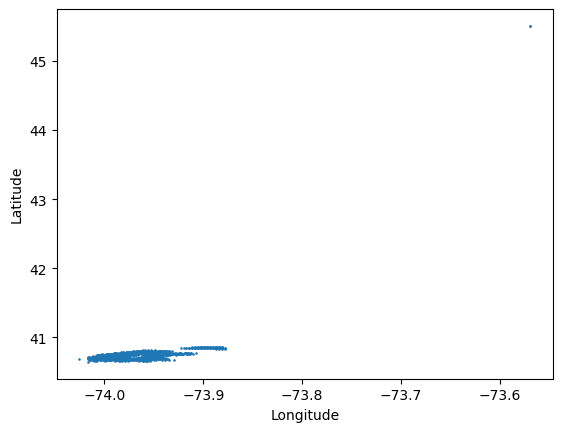

In [11]:
plot_map(coords)

Notice outlier (Canada, Montreal)

In [12]:
# get rid of outlier longitude > -73.6
coords = coords[coords[:,0] < -73.6]

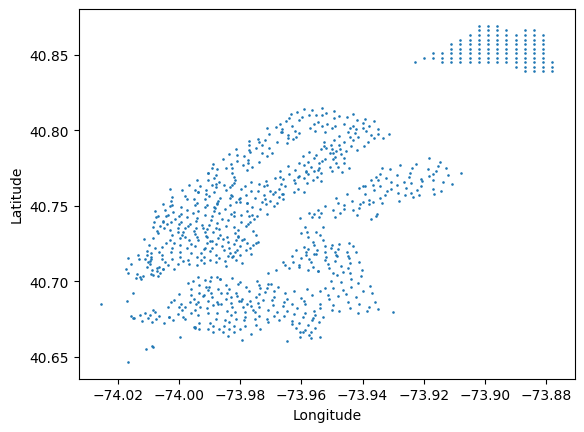

In [13]:
plot_map(coords)
# shows the unique start and end stations present in the dataset.

Notice very structured grid in top right corner. After investigation these data points were NaN's. , get rid of these data points.

In [13]:
# print where nan is in df
print(df.isnull().sum())
df = df[~np.isnan(df['start_station_id'])]
df = df[~np.isnan(df['end_station_id'])]
# get rid of row where longitude > -73.6
df = df[df['start_station_longitude'] < -73.6]
df = df[df['end_station_longitude'] < -73.6]
# get lat and long
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)

tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
birth_year                    0
gender                        0
usertype_Subscriber           0
dtype: int64


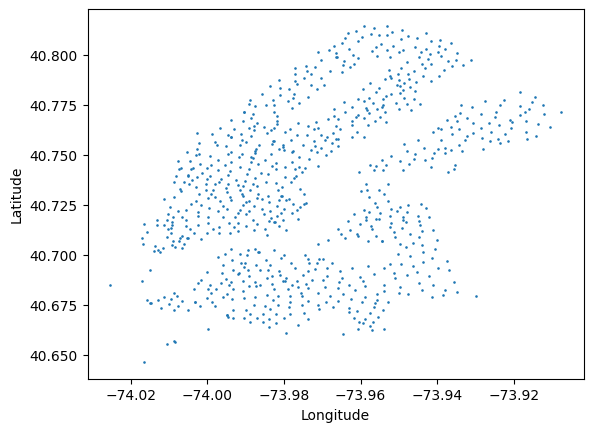

In [14]:
plot_map(coords)

In [15]:
# import kmeans
from sklearn.cluster import KMeans

In [16]:
# make kmeans model
kmeans = KMeans(n_clusters=20, random_state=0).fit(coords) # using coords here instead of df to increase speed

C:\Users\alexi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Train on coords to save time, then predict to save labels on df, trained on same data as predict so will be correct

In [17]:
df['label'] = kmeans.predict(df[['start_station_longitude','start_station_latitude']].values)

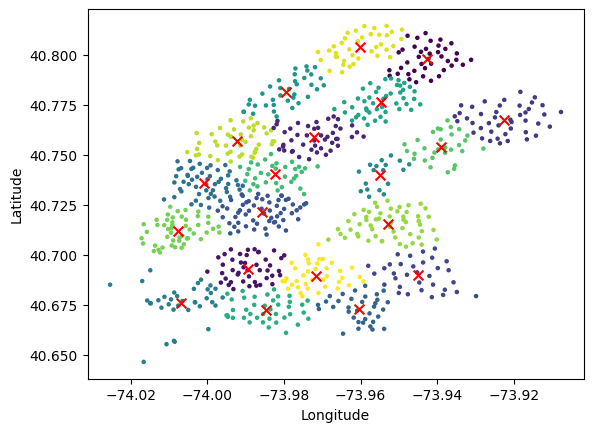

In [18]:
# plot with cluster colour & centriods
plt.scatter(coords[:,0], coords[:,1], c=kmeans.labels_, s=5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker="x", s=50)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

**Now part 2**

We need to predict the following

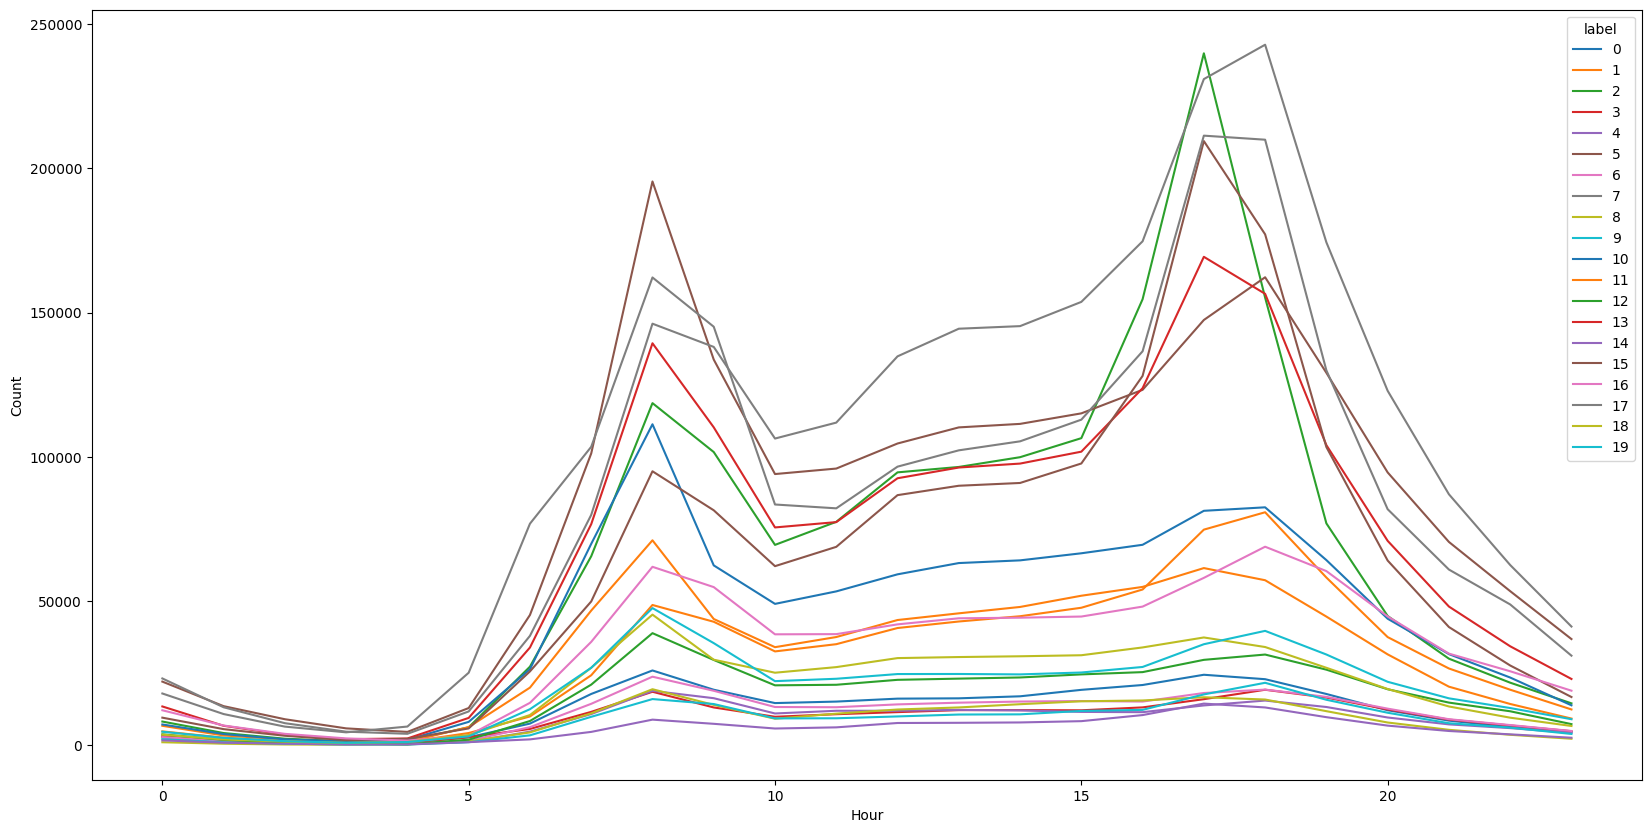

In [19]:
# 1st plot amount of predictions per hour per cluster
grouby_label = df.groupby(['label', df['starttime'].dt.hour]).size().reset_index(name='count')
grouby_label = grouby_label.pivot(index='starttime', columns='label', values='count')
grouby_label.plot(figsize=(20,10))
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

In [20]:
grouby_label.head()
# included more data from df to grouby_label
grouby_label = df.groupby(['label', df['starttime'].dt.hour, df['usertype_Customer']]).size().reset_index(name='count')
print(grouby_label.head())
# pivot table
grouby_label = grouby_label.pivot(index=['starttime', 'usertype_Customer'], columns='label', values='count')
grouby_label.head()

# more data
grouby_label = df.groupby(['label', df['starttime'].dt.hour, df['usertype_Customer'], df['usertype_Subscriber']]).size().reset_index(name='count')
grouby_label = grouby_label.pivot(index=['starttime', 'usertype_Customer', 'usertype_Subscriber'], columns='label', values='count')
grouby_label.head()


KeyError: 'usertype_Customer'

In [ ]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Customer,usertype_Subscriber,label
trip_id,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,0,1,17
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,0,1,17
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,0,1,17
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,0,1,17
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,0,1,17


In [ ]:
# amount of predictions per hour per cluster in df
df['demand'] = df.groupby(['label', df['starttime'].dt.hour])['label'].transform('count')
df.head()



,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Customer,usertype_Subscriber,label,demand
trip_id,,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,0,1,17,102247
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,0,1,17,112884
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,0,1,17,112884
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,0,1,17,112884
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,0,1,17,209964


In [ ]:
grouby_label.head()

label                          0     1     2     3     4      5     6      7    
starttime usertype_Customer                                                     
0         0                  2547  5763  7027  2800  2381  19630  2502  20518  \
          1                   316   955  1173   331   316   2419   271   2628   
1         0                  1260  2808  3570  1428  1531  12025  1395  11620   
          1                   187   574   643   227   221   1513   139   1531   
2         0                   769  1690  1811   782   878   7956   707   6584   

label                         8     9     10    11    12     13    14    15   
starttime usertype_Customer                                                   
0         0                  897  1742  6279  4294  3443  12074  1448  7954  \
          1                  127   329   908   493   334   1361   227  1593   
1         0                  446   843  3299  2295  1625   6001   722  4545   
          1                   67   164   563   317   203    728   140  1022   
2         0                  208   454  1718  1138   828   3283   441  2687   

label                           16     17    18    19  
starttime usertype_Customer                            
0         0                  10644  15295  3206  4310  
          1                   1467   2635   444   365  
1         0                   5962   9111  1726  2331  
          1                    861   1687   265   212  
2         0                   3380   5439  1010  1294

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# split data into train and test (80/20)
train = df.sample(frac=0.8,random_state=42)
test = df.drop(train.index)

In [ ]:
# make linear regression model per cluster/label
models = []
for i in range(20):
    X = grouby_label[i].index.values.reshape(-1, 1)
    y = grouby_label[i].values
    regr = linear_model.LinearRegression()
    print(X.shape)
    print(y.shape)
    print(type(X))
    print(type(y))
    print(X[0])
    print(y[0])
    regr.fit(X, y)
    models.append(regr)
    

# for i in range(20):
    # X = train[train['label'] == i]['starttime'].dt.hour.values.reshape(-1, 1)
    # y = train[train['label'] == i]['tripduration'].values
    # regr = linear_model.LinearRegression()
    # regr.fit(X, y)
    # models.append(regr)
# THIS ISNT USING THE RIGHT X YET, not sure how the groupby df is working rn

# for i in range(20):
#     X = grouby_label[i].index.values.reshape(-1, 1)
#     y = grouby_label[i].values
#     regr = linear_model.LinearRegression()
#     regr.fit(X, y)
#     models.append(regr)

(48, 1)
(48,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[(0, 0)]
2547


ValueError: setting an array element with a sequence.

In [ ]:
# make predictions
preds = []
for i in range(20):
    preds.append(models[i].predict(grouby_label[i].index.values.reshape(-1, 1)))


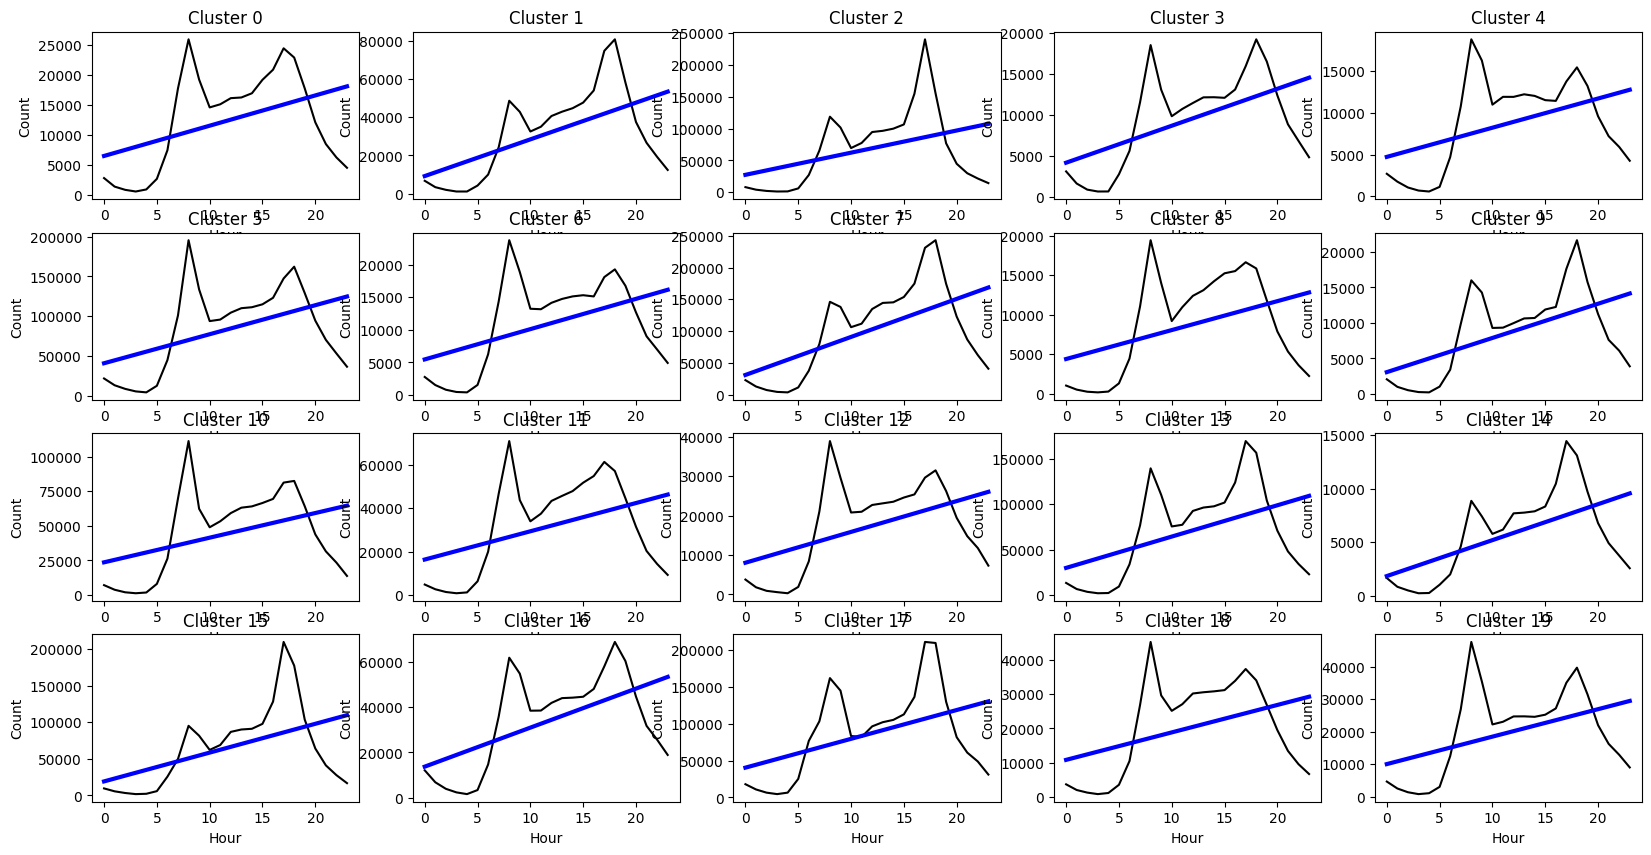

In [ ]:
# plot predictions 4x5 grid
fig, axs = plt.subplots(4, 5, figsize=(20, 10))
axs = axs.ravel()
for i in range(20):
    axs[i].plot(grouby_label[i].index.values, grouby_label[i].values, color='black')
    axs[i].plot(grouby_label[i].index.values, preds[i], color='blue', linewidth=3)
    axs[i].set_title('Cluster ' + str(i))
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('Hour')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

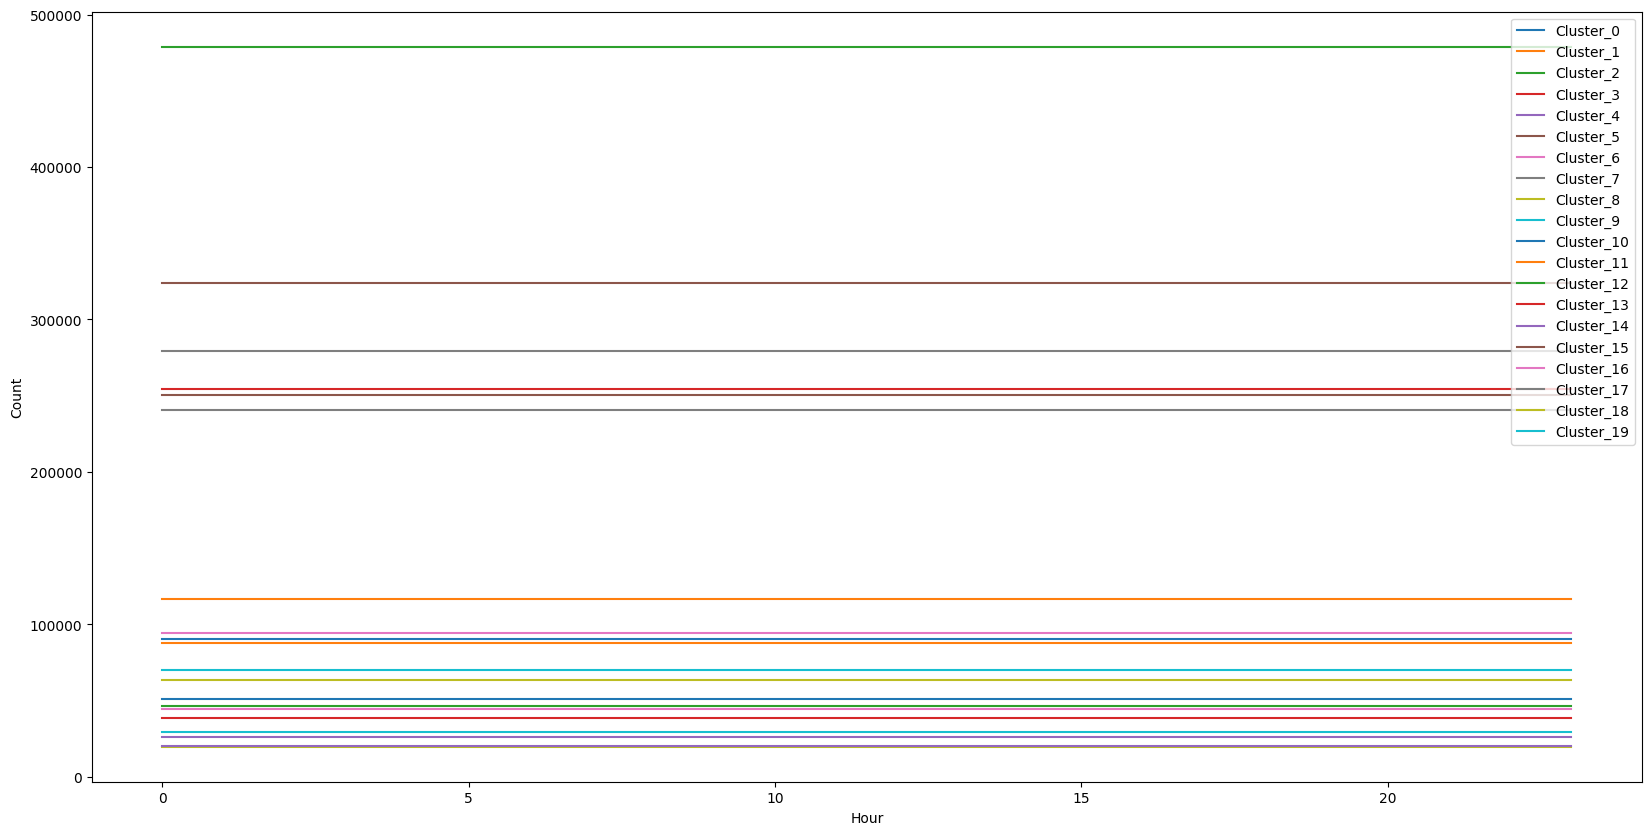

In [ ]:
# Create an empty dictionary to store the linear regression models for each cluster
models = {}

# Train a linear regression model for each cluster
for cluster_label in range(20):
    # Filter the data for the current cluster
    cluster_data = df[df['label'] == cluster_label]
    
    # Extract features (X) and target (y)
    X = cluster_data[['starttime']].values
    y = cluster_data['demand'].values
    
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the model in the dictionary
    models[cluster_label] = model

# Create an empty DataFrame to store the predictions
predictions_df = pd.DataFrame()

# Make predictions for each cluster and add them to the DataFrame
for cluster_label in range(20):
    # Extract the hours for which you want to make predictions
    hours_to_predict = grouby_label.index.values
    
    # Create a feature matrix with these hours
    X_predict = hours_to_predict.reshape(-1, 1)
    
    # Make predictions using the model for the current cluster
    predictions = models[cluster_label].predict(X_predict)
    
    # Add the predictions to the DataFrame
    predictions_df['Cluster_' + str(cluster_label)] = predictions

# Plot the predictions
predictions_df['Hour'] = hours_to_predict
predictions_df.set_index('Hour', inplace=True)
predictions_df.plot(figsize=(20, 10))
plt.ylabel('Count')
plt.xlabel('Hour')
plt.show()

Collaboration # not included in wordcouter.py
